In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn



In [100]:
dataFrame =pd.read_excel("merc.xlsx")
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [101]:
dataFrame.describe()


,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [102]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


In [103]:
print(dataFrame.describe())

               year          price        mileage           tax           mpg  \
count  13119.000000   13119.000000   13119.000000  13119.000000  13119.000000   
mean    2017.296288   24698.596920   21949.559037    129.972178     55.155843   
std        2.224709   11842.675542   21176.512267     65.260286     15.220082   
min     1970.000000     650.000000       1.000000      0.000000      1.100000   
25%     2016.000000   17450.000000    6097.500000    125.000000     45.600000   
50%     2018.000000   22480.000000   15189.000000    145.000000     56.500000   
75%     2019.000000   28980.000000   31779.500000    145.000000     64.200000   
max     2020.000000  159999.000000  259000.000000    580.000000    217.300000   

         engineSize  
count  13119.000000  
mean       2.071530  
std        0.572426  
min        0.000000  
25%        1.800000  
50%        2.000000  
75%        2.100000  
max        6.200000  


In [104]:
print(dataFrame.isnull().sum())

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64


C:\Users\Fulya\AppData\Local\Temp\ipykernel_20860\2421513332.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame['price'])


<Axes: xlabel='price', ylabel='Density'>

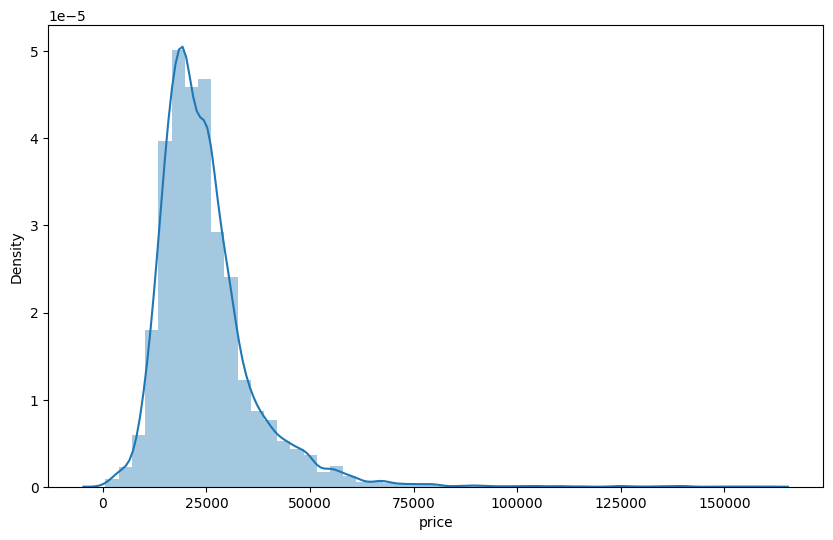

In [105]:
plt.figure(figsize=(10,6))
sbn.distplot(dataFrame['price'])

In [106]:
print(dataFrame['price'].mean().round(4))

24698.5969


<Axes: xlabel='year', ylabel='Count'>

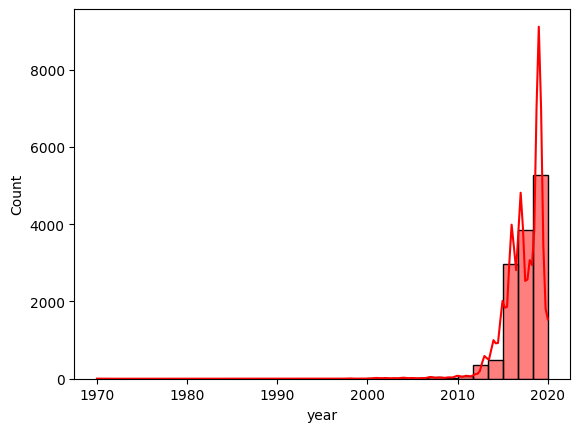

In [107]:
sbn.histplot(dataFrame['year'], bins=30, kde=True, color='red')

burada dataFrame.corr() kodundan hata alındı. bu yüzden tranmission sütununun çıkarılması gerekti.

In [108]:
dataFrame.dtypes

year              int64
price             int64
transmission     object
mileage           int64
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [109]:
numeric_df = dataFrame.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [110]:
numeric_df.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

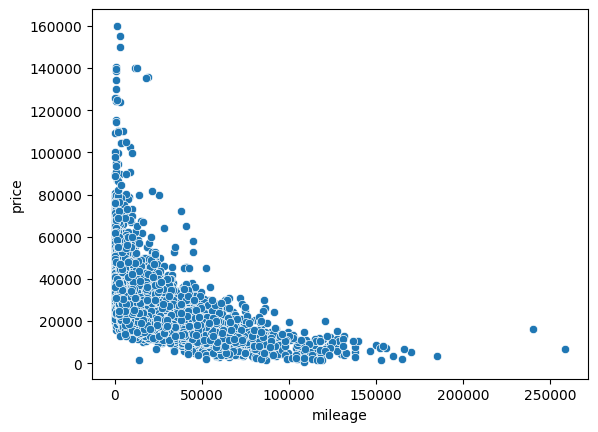

In [111]:
sbn.scatterplot(x='mileage', y='price', data=dataFrame)

<Axes: xlabel='year', ylabel='price'>

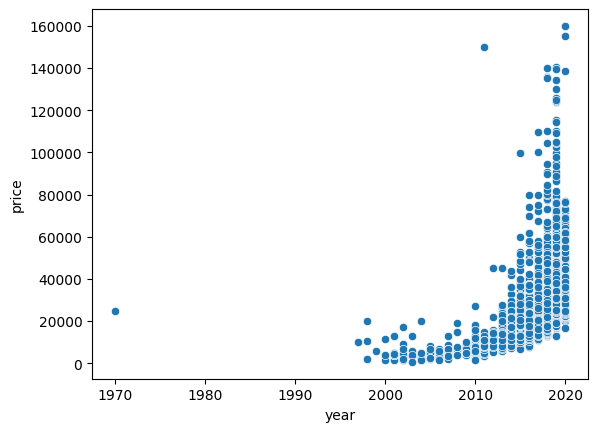

In [112]:
sbn.scatterplot(x='year', y='price', data=dataFrame)

Text(0.5, 1.0, 'Correlation Heatmap')

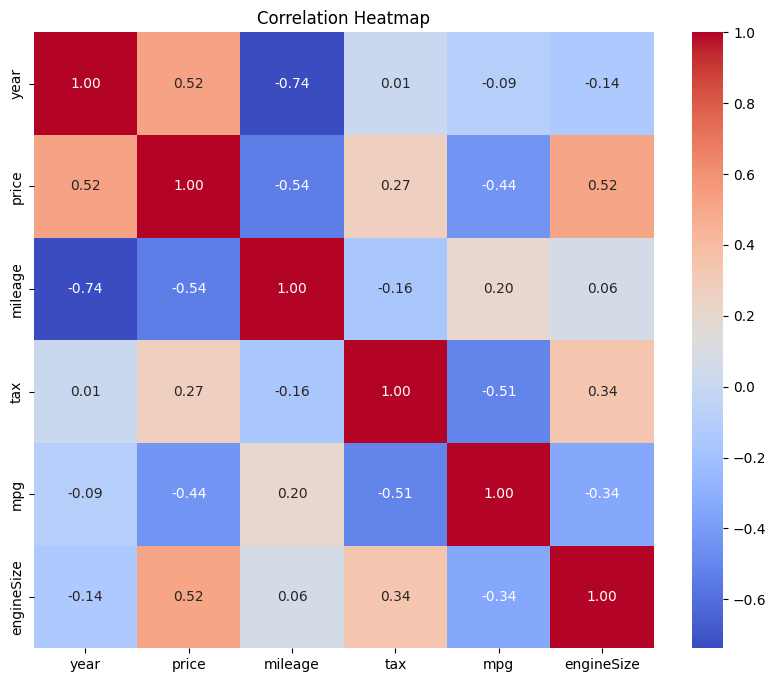

In [113]:
plt.figure(figsize=(10, 8))
sbn.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')

<Axes: ylabel='price'>

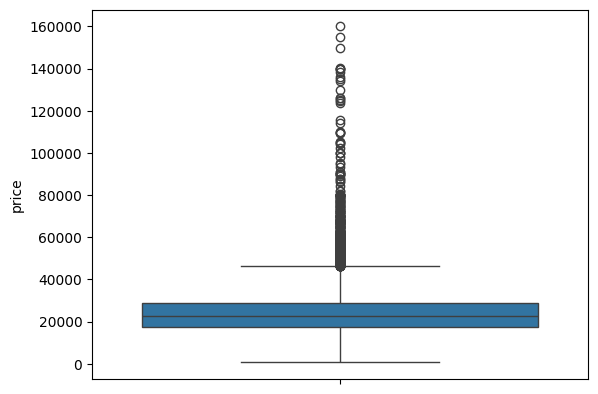

In [114]:
sbn.boxplot(dataFrame['price'])

burada yüksek fiyatlı outliersları görüyoruz. bu şekilde benim datasetim bozuluyor. bunu istemiyorum.  düşük outlierslar yok gibi duruyor. bunların neler olduğunu sıralı bir şekilde görmek istiyorum. 

In [115]:
dataFrame.sort_values("price", ascending=False).head(20)
# burada en yüksek fiyatlı arabaları sıralıyoruz.

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [116]:
dataFrame.sort_values("price", ascending=True).head(20)
# burada en düşük fiyatlı arabaları sıralıyoruz.

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


13119 adet veri var.  en yüksek fiyatlı arabalardan tüm verinin 1%' kadarını çıkartarak daha iyi tahminler yapılabilir.

In [117]:
len(dataFrame)*0.01

131.19

In [118]:
kalanDF =dataFrame.sort_values("price", ascending=False).iloc[131:]

In [119]:
len(kalanDF)

12988

In [120]:
kalanDF.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


<Axes: ylabel='price'>

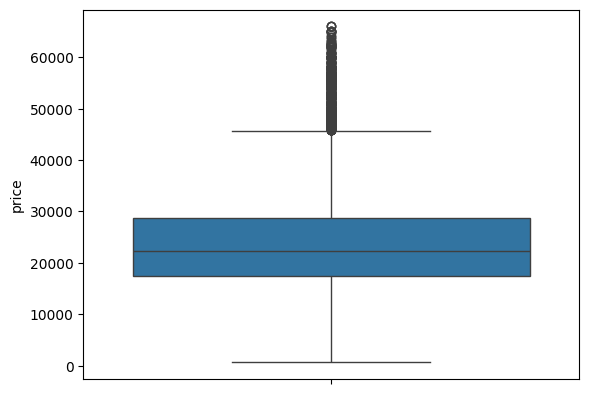

In [121]:
sbn.boxplot(kalanDF['price'])

hala aykıtı değerlerim var fakat kuyruk uzunluğunun azaldığını görüyoruz. bu aşamadan sonra veriyi daha fazla manipüle etmemeye karar veriyorum. Tahminleri daha doğru yapması için.

C:\Users\Fulya\AppData\Local\Temp\ipykernel_20860\883648194.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(kalanDF['price'])


<Axes: xlabel='price', ylabel='Density'>

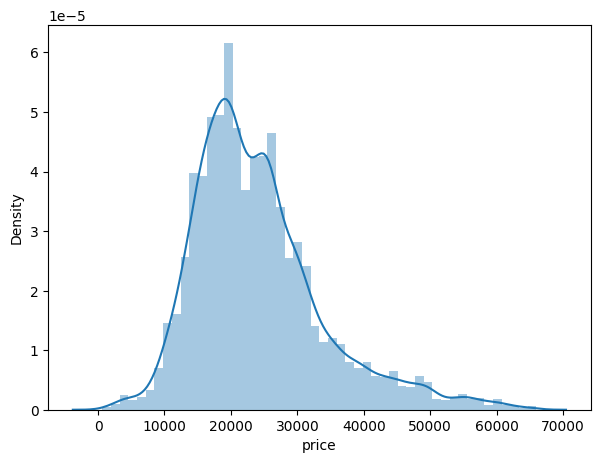

In [122]:
plt.figure(figsize=(7,5))
sbn.distplot(kalanDF['price'])

distplotunda daha güzel göründüğünü görüyorum. verinin çarpıklığında azalma var ve daha normal dağılıma benzemiş. verilerin hala %99'u elimde. ve bununda çok daha güzel ilerleyebilirim.

In [123]:
dataFrame.groupby("year")["price"].mean()

#yıllara göre ortalama araba fiyatlarını listelendi groupby ile.
#1970 yılında araba fıyatlarının 25.000 pound olduğunu görüyoruz.
#1997 yılına kadar bir istatistik elimizde yok. 2018 yılından sonra fiyatlarında tekrar 25000 pound seviyelerine geldiğini görüyoruz.

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [124]:
kalanDF.groupby("year")["price"].mean()
#1970 yılında hala bir anamoli var.  bu yüzden bu yılı çıkartabiliriz.

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [135]:
len(kalanDF)

12988

In [136]:
dataFrame[dataFrame.year != 1970].groupby("year")["price"].mean()

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [137]:
dataFrame= kalanDF

In [138]:
dataFrame=dataFrame[dataFrame.year != 1970] 

In [139]:
dataFrame.groupby("year")["price"].mean()

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [140]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


numeric veri olmayan transmission kısmını regresyon yapmadan önce çıkartırız.

In [141]:
dataFrame = dataFrame.drop("transmission", axis=1)

veri temizliği bu kısımda bitti şimdi modeli eğiteceğiz.

In [149]:
y= dataFrame["price"].values
x= dataFrame.drop("price", axis=1).values

In [150]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], shape=(12987,))

In [151]:
x = dataFrame.drop("price", axis=1).values
print(x.shape)

(12987, 5)


In [152]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]],
      shape=(12987, 5))

In [153]:
from sklearn.model_selection import train_test_split

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)   

In [157]:
len(x_train)

9090

In [158]:
len(x_test)

3897

In [159]:
from sklearn.preprocessing import MinMaxScaler

In [160]:
scaler = MinMaxScaler()

In [161]:
x_train =scaler.fit_transform(x_train)

In [162]:
x_test = scaler.transform(x_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [168]:
x_train.shape

(9090, 5)

In [169]:
model = Sequential()
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [170]:
model.fit (x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=250, epochs=300)

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 672145664.0000 - val_loss: 688101184.0000
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 672117952.0000 - val_loss: 688055680.0000
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 672038208.0000 - val_loss: 687911616.0000
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 671746368.0000 - val_loss: 687355584.0000
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 670698688.0000 - val_loss: 685517120.0000
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 667664512.0000 - val_loss: 680680320.0000
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 660425792.0000 - val_loss: 669992960.0000
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 645605696.0000 - val_loss: 649379968.0000
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 618698816.0000 - val_loss: 613900096.0000
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 574629760.0000 - val_loss: 557

In [171]:
kayipVerisi = pd.DataFrame(model.history.history)

In [172]:
kayipVerisi.head()

,loss,val_loss
0,672145664.0,688101184.0
1,672117952.0,688055680.0
2,672038208.0,687911616.0
3,671746368.0,687355584.0
4,670698688.0,685517120.0


<Axes: >

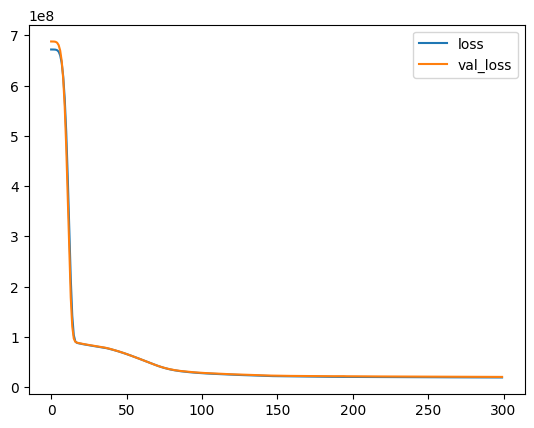

In [173]:
kayipVerisi.plot()

grafik görüntüsü tatmin edici. loss ve validation loss birlikte ilerlemiş bu istenilen bir şey.

In [174]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [175]:
tahminDizisi = model.predict(x_test)

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [176]:
tahminDizisi

array([[25674.225],
       [22673.254],
       [25262.832],
       ...,
       [22440.406],
       [19489.062],
       [26255.775]], shape=(3897, 1), dtype=float32)

In [177]:
mean_absolute_error(y_test, tahminDizisi)

3197.985595703125

3197 poundluk bir hata oluşur denir. %13'lük bir hata oluşur. 


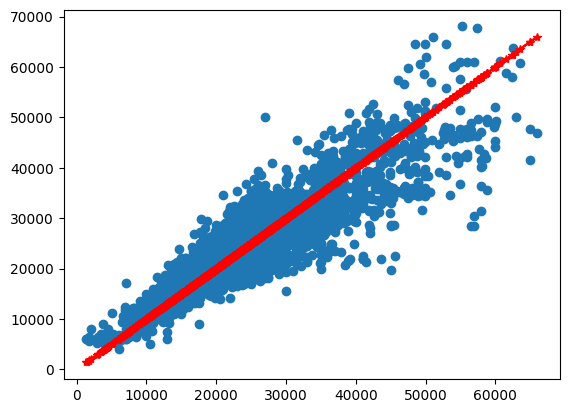

In [180]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test, y_test, 'r-*')  

In [182]:
yeniArabaSeries =dataFrame.drop("price", axis=1).iloc[2]

In [183]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [184]:
model.predict(yeniArabaSeries)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[62285.594]], dtype=float32)

65980 pound olan arabanın fiyatını 62285 olarak tahmin etti. 3200 poundluk bir hata zaten beklediğimiz bir hataydı. Model yeterli düzeyde çalışır.